In [1]:
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
question_file = '../clevr-dataset/questions/CLEVR_train_questions.json'
vocab_file = './vocabulary_clevr.txt'
answer_file = './answers_clevr.txt'

In [3]:
with open(question_file) as f:
    questions = json.load(f)['questions']

In [4]:
vocab_set = set()
answer_set = set()
SENTENCE_SPLIT_REGEX = re.compile(r'(\W+)')
question_length = [None]*len(questions)
function_length = [None]*len(questions)
for n_q, q in enumerate(questions):
    answer_set.add(q['answer'])
    words = SENTENCE_SPLIT_REGEX.split(q['question'].lower())
    words = [w.strip() for w in words if len(w.strip()) > 0]
    vocab_set.update(words)
    question_length[n_q] = len(words)
    function_length[n_q] = len(q['program'])

In [5]:
vocab_list = list(vocab_set)
vocab_list.sort()
answer_list = list(answer_set)
answer_list.sort()

print('vocabulary list:')
print(vocab_list)
print('\nanswer list:')
print(answer_list)

with open(vocab_file, 'w') as f:
    f.writelines([w+'\n' for w in vocab_list])
with open(answer_file, 'w') as f:
    f.writelines([w+'\n' for w in answer_list])

vocabulary list:
[';', '?', 'a', 'an', 'and', 'another', 'any', 'anything', 'are', 'as', 'ball', 'balls', 'behind', 'big', 'block', 'blocks', 'blue', 'both', 'brown', 'color', 'cube', 'cubes', 'cyan', 'cylinder', 'cylinders', 'do', 'does', 'either', 'else', 'equal', 'fewer', 'front', 'gray', 'greater', 'green', 'has', 'have', 'how', 'in', 'is', 'it', 'its', 'large', 'left', 'less', 'made', 'many', 'material', 'matte', 'metal', 'metallic', 'more', 'number', 'object', 'objects', 'of', 'on', 'or', 'other', 'purple', 'red', 'right', 'rubber', 'same', 'shape', 'shiny', 'side', 'size', 'small', 'sphere', 'spheres', 'than', 'that', 'the', 'there', 'thing', 'things', 'tiny', 'to', 'visible', 'what', 'yellow']

answer list:
['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'blue', 'brown', 'cube', 'cyan', 'cylinder', 'gray', 'green', 'large', 'metal', 'no', 'purple', 'red', 'rubber', 'small', 'sphere', 'yellow', 'yes']


maximum question length: 45


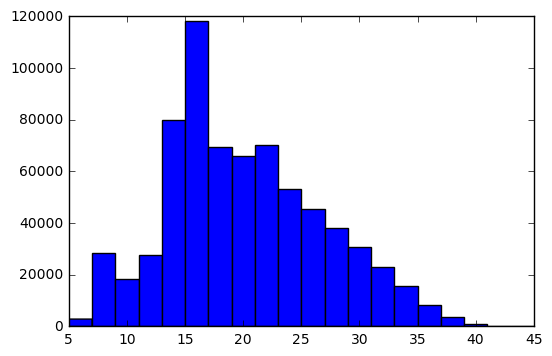

In [6]:
_ = plt.hist(question_length, bins=20)
print('maximum question length:', np.max(question_length))

maximum function length: 25


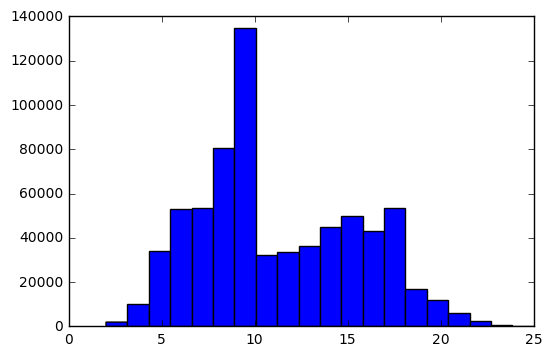

In [7]:
_ = plt.hist(function_length, bins=20)
print('maximum function length:', np.max(function_length))